# Ex03 : Generation using NEUT

In [1]:
!cat ../../interactive/NEUT_MINERvA_example.sh

#!/bin/bash

## The output file name
OUTFILE=NEUT570_MINERvA_LE_FHC_numu.root

## The file that sets physics parameters for the NEUT simulation
INCARD=${PWD}/MC_inputs/MINERvA_LE_numu_NEUT.card

## This is NEUT's event generation application
echo "Starting neutroot2..."
neutroot2 ${INCARD} ${OUTFILE} &> /dev/null

## Only one NUISANCE step is required for NEUT
echo "Creating NUISANCE flat trees"
nuisflat -f GenericVectors -i NEUT:${OUTFILE} -o ${OUTFILE/.root/_NUISFLAT.root}


Let's break down the provided script:

```bash
#!/bin/bash

## The output file name
OUTFILE=NEUT570_MINERvA_LE_FHC_numu.root

## The file that sets physics parameters for the NEUT simulation
INCARD=${PWD}/MC_inputs/MINERvA_LE_numu_NEUT.card

## This is NEUT's event generation application
echo "Starting neutroot2..."
neutroot2 ${INCARD} ${OUTFILE} &> /dev/null

## Only one NUISANCE step is required for NEUT
echo "Creating NUISANCE flat trees"
nuisflat -f GenericVectors -i NEUT:${OUTFILE} -o ${OUTFILE/.root/_NUISFLAT.root}
```

This script demonstrates a workflow involving NEUT event generation followed by NUISANCE analysis steps for further processing and analysis of the generated events. We can run all the actual generation as a single line below in a bash cell provided we have the params file.

In [2]:
# BASH COMMAND
!neutroot2 MC_inputs/MINERvA_LE_numu_NEUT.card MC_outputs/NEUT570_MINERvA_LE_FHC_numu.root > /dev/null

### Creating NUISANCE Flat Trees

NEUT output files are ready for further analysis with NUISANCE, the script proceeds to create NUISANCE flat trees. Let's understand this step:

```bash
echo "Creating NUISANCE flat trees"
nuisflat -f GenericVectors -i NEUT:${OUTFILE/.root/_NUIS.root} -o ${OUTFILE/.root/_NUISFLAT.root}
```

   - **Command**: `nuisflat` is a NUISANCE application used to create flat trees for further analysis.
   - **Options**:
     - `-f GenericVectors`: Specifies the type of flat trees to create. In this case, it indicates the use of generic vectors.
     - `-i NuWro:${OUTFILE/.root/_NUIS.root}`: Specifies the input file for creating flat trees. Here, the prepared NuWro output file is used.
     - `-o ${OUTFILE/.root/_NUISFLAT.root}`: Specifies the output file name for the created flat trees. Here, `.root` in the original filename is replaced with `_NUISFLAT.root`.

This step generates NUISANCE flat trees from the prepared NuWro output file. These flat trees are structured data formats that simplify subsequent analysis tasks by organizing data into easily accessible formats, facilitating efficient analysis with NUISANCE tools.

In [3]:
# BASH COMMAND
!nuisflat -f GenericVectors \
    -i NEUT:MC_outputs/NEUT570_MINERvA_LE_FHC_numu.root \
    -o MC_outputs/NEUT570_MINERvA_LE_FHC_numu_NUISFLAT.root

Nuisance: Neutrino Interaction Systematics Aggregating New by Comparing Experiments  -- Fit and compare.
[ NUISANCE ]: Loading DEFAULT settings from : /opt/nuisance/parameters/config.xml
[ NUISANCE ]: Finished nuisconfig.
[LOG Fitter]:  : nuisflat.cxx::GetCommandLineArgs[l. 102] : Reading Input File = NEUT:MC_outputs/NEUT570_MINERvA_LE_FHC_numu.root
[LOG Fitter]:  : nuisflat.cxx::GetCommandLineArgs[l. 111] : Saving flattree in format = GenericVectors
[LOG Fitter]:  : nuisflat.cxx::GetCommandLineArgs[l. 121] : Saving nuisflat output to MC_outputs/NEUT570_MINERvA_LE_FHC_numu_NUISFLAT.root
[ NUISANCE ]: Setting VERBOSITY=4
[ NUISANCE ]: Setting ERROR=2
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for /opt/neut-src/neutclass/neutctrl.h
   requested to autoload type NeutCtrl
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for /opt/neut-src/neutclass/neutfsipart.h
   requested to autoload type NeutFsiPart
Error in c

# PyROOT Output Processing

Now that we have created a NUISANCE flat tree we can plot different generator level quantities in a standard way. An example is given using python in the code below. The advantage of this is the analysis can be repeated for any generator by simple changing the ROOT TFile to point at another NUISANCE flat tree that has been created from the raw generator outputs.

In [4]:
import ROOT
f = ROOT.TFile("MC_outputs/NEUT570_MINERvA_LE_FHC_numu_NUISFLAT.root","READ")
f.ls()

Welcome to JupyROOT 6.30/04
TFile**		MC_outputs/NEUT570_MINERvA_LE_FHC_numu_NUISFLAT.root	
 TFile*		MC_outputs/NEUT570_MINERvA_LE_FHC_numu_NUISFLAT.root	
  KEY: TTree	FlatTree_VARS;2	FlatTree_VARS [current cycle]
  KEY: TTree	FlatTree_VARS;1	FlatTree_VARS [backup cycle]
  KEY: TH1D	FlatTree_FLUX;1	FlatTree_FLUX
  KEY: TH1D	FlatTree_EVT;1	FlatTree_EVT


Inside each file you'll see we have a TTree, and the FLUX and Event Rate (EVT) histograms. NUISANCE needs this to properly determine either flux averaged or flux unfolded cross-sections. They are calculated at the Prepare stage but included here in case you need it.

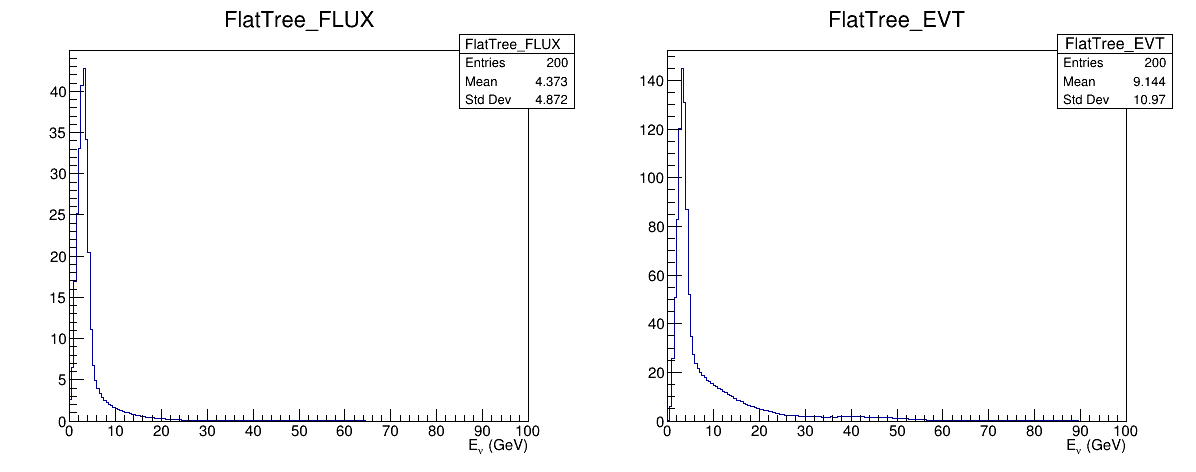

In [5]:
c1 = ROOT.TCanvas("c1","c1",1200,500)
c1.Divide(2,1)

c1.cd(1)
f.FlatTree_FLUX.Draw()

c1.cd(2)
f.FlatTree_EVT.Draw()

c1.Draw()

The most important thing in the file is the FlatTree itself. This contains a list of all particles in the event alongside a set of precalculated quantities of interest.

In [6]:
fvs = f.Get("FlatTree_VARS")
fvs.Show(0)

======> EVENT:0
 Mode            = 21
 GENIEResCode    = 9999
 cc              = 1
 PDGnu           = 14
 Enu_true        = 3.07557
 tgt             = 1000060120
 tgta            = 12
 tgtz            = 6
 PDGLep          = 13
 ELep            = 0.6616
 CosLep          = 0.717023
 Q2              = 1.17789
 q0              = 2.41397
 q3              = 2.64672
 Enu_QE          = 0.875655
 Q2_QE           = 0.327376
 W_nuc_rest      = 2.05728
 W               = 2.05728
 W_genie         = -999
 x               = 0.260025
 y               = 0.784885
 Erecoil_minerva = 1.28461
 Erecoil_charged = 0.287047
 EavAlt          = 1.20519
 Emiss           = 0.190524
 pmiss           = (TVector3*)0x5591ca9553d0
 Emiss_preFSI    = -0.019623
 pmiss_preFSI    = (TVector3*)0x5591ca9b2bf0
 CosThetaAdler   = -999.9
 PhiAdler        = -999.9
 dalphat         = 2.60751
 dpt             = 463.57
 dphit           = 1.33684
 pnreco_C        = 0.46936
 nfsp            = 8
 px              = -0.251995, 
        

Some interesting ones are:
- `Mode` : NEUT Interaction code. Other generators are converted into this (+-1 CCQE, +-2 2p2h, etc).
- `flagXXX`: Different final state topoology selections.
- `fScaleFactor`: A weighting factor that can be used to convert all predictions into flux averaged total cross-sections.
- `px,py,pz,E,pdg`: List of final state particle momenta, energies, and pdgs.
- `q0,q3,Q2`: Momentum transfer information.

In the cell below as an example we draw the true neutrino energy distribution for all events in our small flat tree.

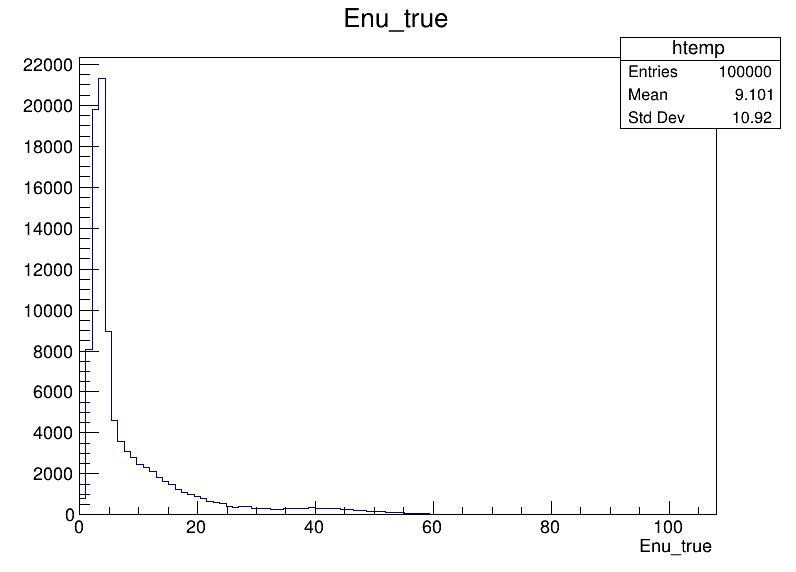

In [7]:
c2 = ROOT.TCanvas("c2","c2",800,600)
c2.cd()
fvs.Draw("Enu_true")
c2.Draw()

We can also do things like plot `q0` vs `q3` for an event using standard TTree draw commands.

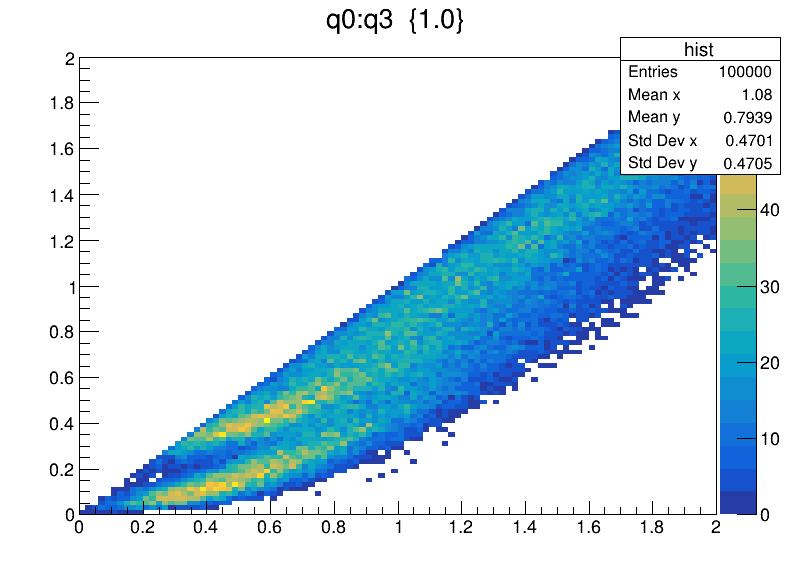

In [8]:
c3 = ROOT.TCanvas("c3","c3",800,600)
fvs.Draw("q0:q3 >> hist(100,0.0,2.0,100,0.0,2.0)","1.0","COLZ")
c3.Draw()

Those topology flags we discussed earlier can come in handy for event selections.

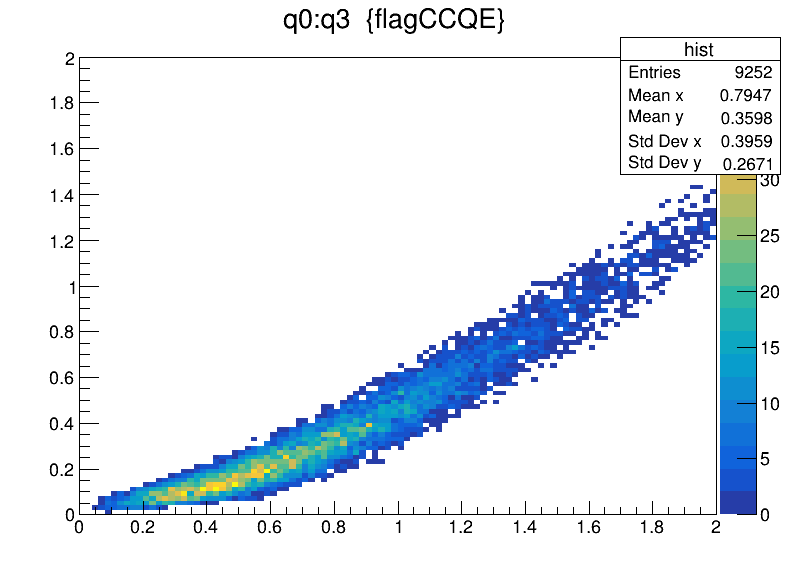

In [9]:
c4 = ROOT.TCanvas("c4","c4",800,600)
fvs.Draw("q0:q3 >> hist(100,0.0,2.0,100,0.0,2.0)","flagCCQE","COLZ")
c4.Draw()

Or we can even write our own based on event selections. The TTree draw `Sum$()` function comes in very handy for these. The command below draws any event where at least one positive pion with an energy greater than 200 MeV is observed in the event.

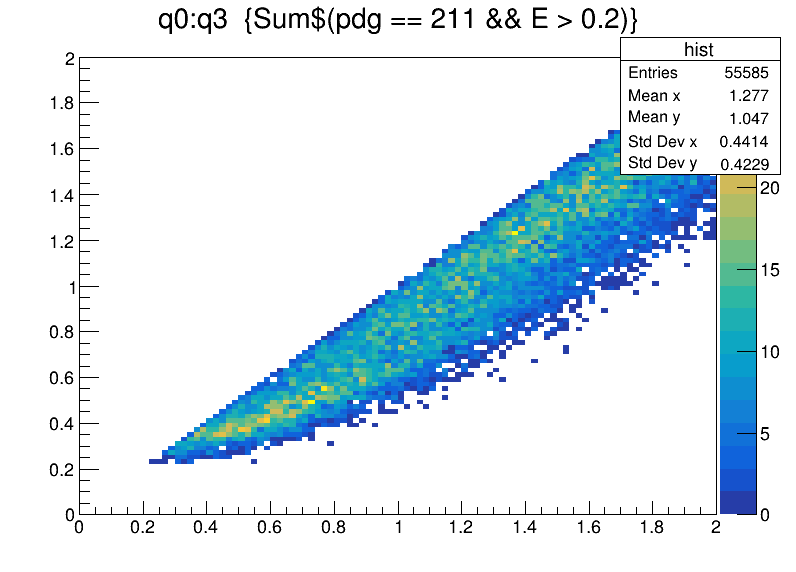

In [10]:
c5 = ROOT.TCanvas("c5","c5",800,600)
fvs.Draw("q0:q3 >> hist(100,0.0,2.0,100,0.0,2.0)","Sum$(pdg == 211 && E > 0.2)","COLZ")
c5.Draw()

That concludes our overview of NUISANCE FlatTree features. For comparing multiple generators using flattree files please see later tutorials.